In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<AxesSubplot:>

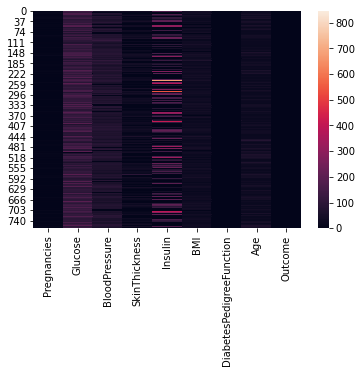

In [6]:
sns.heatmap(df)

In [9]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

<AxesSubplot:>

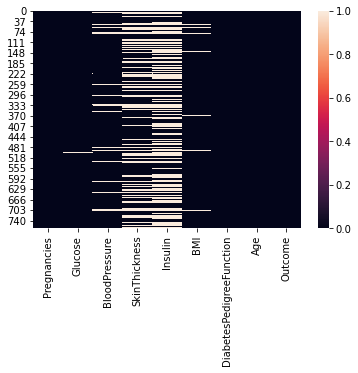

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [13]:
df.fillna(df.mean(),inplace=True)

<AxesSubplot:>

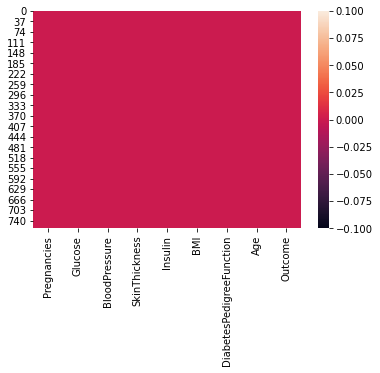

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

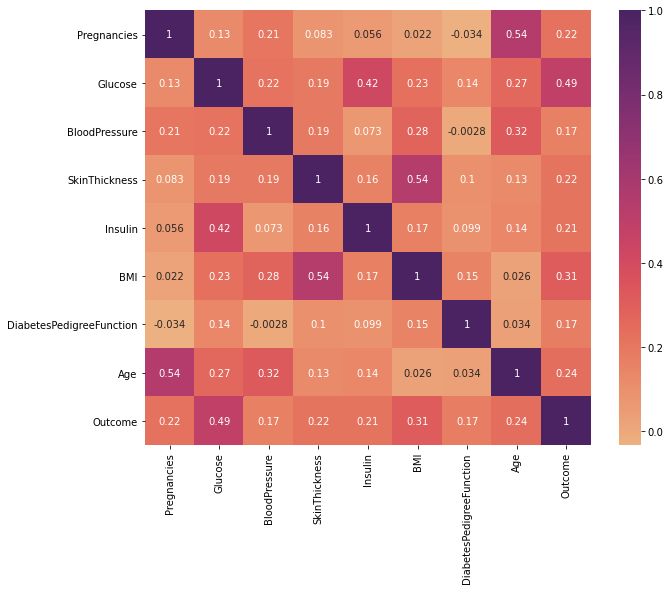

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='flare')

# train test split 

In [19]:
x=df[['Glucose','BMI','Age']]
y=df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
x_train

,Glucose,BMI,Age
110,171.0,33.3,24
717,94.0,23.1,56
244,146.0,38.2,29
474,114.0,28.9,24
132,170.0,34.5,30
...,...,...,...
626,125.0,24.7,21
552,114.0,27.8,66
192,159.0,30.4,36
445,180.0,59.4,25


In [23]:
x_test

,Glucose,BMI,Age
651,117.0,33.8,27
574,143.0,30.1,23
183,73.0,26.8,27
447,95.0,36.5,26
294,161.0,21.9,65
...,...,...,...
560,125.0,33.8,54
513,91.0,27.3,22
391,166.0,45.7,27
564,91.0,32.4,27


In [24]:
y_train

110    1
717    0
244    0
474    0
132    1
      ..
626    0
552    0
192    1
445    1
761    1
Name: Outcome, Length: 537, dtype: int64

In [25]:
y_test

651    0
574    0
183    0
447    0
294    0
      ..
560    1
513    0
391    1
564    0
467    0
Name: Outcome, Length: 231, dtype: int64

# k nearest neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=7)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
predictions=knn.predict(x_test)

In [32]:
predictions

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       152
           1       0.67      0.56      0.61        79

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



# cross validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
df.shape

(768, 9)

In [37]:
768/5

153.6

In [38]:
153.6*4

614.4

In [39]:
ks=list(range(1,600,2))

In [40]:
cvscores=[]

In [42]:
for k in ks:
    testknn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(testknn,x,y,cv=5,scoring='accuracy').mean()
    cvscores.append(score)

In [43]:
cvscores

[0.6784059078176725,
 0.71883541295306,
 0.7396400984636278,
 0.7526695526695526,
 0.7565486800780918,
 0.7604872251931075,
 0.7565571683218743,
 0.7630846277905101,
 0.7630761395467278,
 0.7708768355827178,
 0.7682964094728799,
 0.7643918173329938,
 0.7617774382480265,
 0.7644003055767762,
 0.7669977081741788,
 0.7617859264918089,
 0.7656735421441304,
 0.7604787369493252,
 0.7605042016806722,
 0.7644003055767762,
 0.7644172820643409,
 0.756574144809439,
 0.7578983108394872,
 0.7565911212970036,
 0.7552924199983023,
 0.7592224768695356,
 0.755309396485867,
 0.7579152873270519,
 0.7618113912231559,
 0.7566080977845683,
 0.752703505644682,
 0.756599609540786,
 0.756599609540786,
 0.7605042016806722,
 0.7578983108394872,
 0.7552924199983023,
 0.7592055003819709,
 0.7578898225957049,
 0.7591970121381886,
 0.753993718699601,
 0.7474747474747476,
 0.7539852304558187,
 0.7487819370172311,
 0.752678040913335,
 0.7500806383159324,
 0.7526950174008997,
 0.7513878278584161,
 0.7487904252610134,
 

In [44]:
max(cvscores)

0.7708768355827178

In [45]:
cvscores.index(max(cvscores))

9

In [46]:
ks[9]

19

In [47]:
finalknn=KNeighborsClassifier(n_neighbors=19)
finalknn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [48]:
import pickle

In [49]:
pickle.dump(finalknn,open('KNN Model.pkl','wb'))

In [50]:
loadedmodel=pickle.load(open('KNN Model.pkl','rb'))

In [51]:
loadedmodel

KNeighborsClassifier(n_neighbors=19)

In [52]:
loadedmodel.predict([[200,30,45]])

array([1], dtype=int64)